# A slight introduction to cv and image processing with OpenCV + Bonus
Этот туториал немного выходит за рамки открытого курса, но для коллег, решивших продолжить развиваться в области DL, computer vision, #class_cs231n введение в библиотеку OpenCV будет очень полезным.

OpenCV (англ. Open Source Computer Vision Library, библиотека компьютерного зрения с открытым исходным кодом) — библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом. Реализована на C/C++, также разрабатывается для Python, Java, Ruby, Matlab, Lua и других языков.

В этом туториале продемонстрированно:

 - Как устанавливать нужные библиотеки
 - Особенности чтения изображений и вывода на экран
 - Принцип изображения простых геометрических фигур и текста на изображении
 - Различные преобразования над изображениями
 - Как читать видеопоток с файла и записывать в файл
 - Как читать видеопоток с камеры
 - Чистка изображений, фильтрация элементов изображений
 - Поиск паттернов
 - Распознавание лица и глаз при помощи каскадов Хаара
 - Bonus: распознавание лица и его элементов при помощи библиотеки dlib
P.S. Я настоятельно рекомендую попробовать запустить этоу тетрадку у себя. Я параллельно написанию туториала сам изучаю OpenCV, с некоторыми фичами реально забавно работать (особенно бонусная часть). Надеюсь этот туториал не только принесет немного новых знаний, но и немного Вас развлечет.

P.P.S. За помощь в составлении туториала отдельное спасибо [этому сайту](https://docs.opencv.org/3.0-beta/doc/tutorials/tutorials.html) и [особенно этому](https://pythonprogramming.net/)

# Часть Первая

## Установка OpenCV

Она же самая простая часть.

Для всех систем, на которых я работал достаточно ввести команду типа **pip install opencv-python**

# Часть вторая

## Чтение изображений

In [1]:
# Первым делом импортируем opencv (cv2) и numpy
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Чтение изображений из файла происходит посредством комманды **imread('путь к изображению', флаг)**.

Флаги бывают следующими:

 - cv2.IMREAD_COLOR - по умолчанию, чтение в цвете, но эффект прозрачности (alpha) будет удален
 - cv2.IMREAD_GRAYSCALE - чтение в градации серого
 - cv2.IMREAD_UNCHANGED - чтение цветного изображения включая alpha канал

*Следует отметить, что все флаги в cv2 являются константами, их имена полностью состоят из заглавных букв. Например cv2.IMREAD_COLOR = 1. Подобных констант мы еще встретим не одну*.

In [2]:
img = cv2.imread('../../img/cv2-1.jpeg',  cv2.IMREAD_COLOR)

Следует отдельно добавить, что к каждому пикселю изображения можно отдельно обратиться и изменить его значение. Например так:
```python
px = img[55,55]
print(px)
img[:55,:55] = [255,0,0]

```

## Вывод изображений


Изображение можно вывести при помощи matplotlib и imshow. Но тут стоит быть внимательнее!

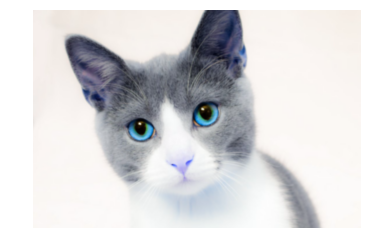

In [3]:
plt.imshow(img, interpolation='bicubic')
plt.axis('off');

Тут следует отдельно заметить, что цветовая схема изображения не соответствует оригиналу. Данный эффект наплюдается по причине того, что opencv читает и пишет изображения в формате BGR, следовательно для корректного изображения картинки посредством matplotlib, её необходимо преобразовать в формат RGB. Для этого используется команда cvtColor(img, флаг). Флагов очень много, проэтому советую ознакомиться с документацией или поэксперементировать.

In [4]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

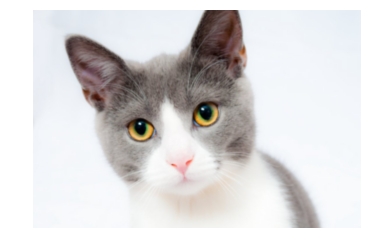

In [5]:
plt.imshow(img_rgb, interpolation='bicubic')
plt.axis('off');


Второй способ отображения - штатный, но тут тоже есть свои особенности:

1. Изображение открывается в отдельном окне
2. Для закрытия изображения нужны две функции: waitKey(time) - после нажатия любой клавиши ждет time мсек до выполнения следующей функции, destroyAllWindows() - закрывает все окна
3. **При сипользовании Jupyter и других тетрадок ни в коем случае на закрывайте окно нажатием "на крестик" мышкой - это повесит ваш кернел**
4. Сама команда: **imshow('название окна', image)**

In [6]:
#Выводим окно с картинкой и закрываем нажатием любой клавиши клавиатуры
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

##Сохранение изображений

С сохранением изображений все очень просто и осуществляется посредством функии **imwrite**:
```python
cv2.imwrite('путь')
```

## Часть третья
### Рисуем на изображении фигуры и пишем текст

Эта базовая часть в последствии будет очень полезной, поэтому её освоить нужно одной из первых. Хороший пример тут

В нашем распоряжении круги, прямоугольники, линии, текст, полигоны, овалы. Рассмотрим чуть подробнее часть из них:

 - **line**(Image, (x1, y1), (x2, y2), color, thickness, lineType), (x1, y1), (x2, y2) - координаты первой и последней точек линии
 - **rectangle**(Image, (x1, y1), (x2, y2), color, thickness, lineType, shift), (x1, y1), (x2, y2) - координаты верхнего левого и нижнего правого углов
 - **circle**(Image, (x1, y1), radius, color, thickness, lineType, shift), (x1, y1) координаты центра окружности
 - **polylines**(Image, pts, npts, ncontours, isClosed, color, thickness, lineType, shift), pts - координаты точек, isClosed - замыкание контура
 - **putText**(img, text, org, font, fontFace, fontScale, color, thickness, lineType), text - текст, org - нижний левый угол начала текста

In [7]:
draw = img
cv2.line(draw, (300,300), (150,150), (255,255,255), 15, 5);
cv2.rectangle(draw, (15,25), (200,150), (255,0,0), 5)
# thickness = -1 означает полностью залить фигуру цветом
cv2.circle(draw, (100,63), 55, (0,0,255),-1);
pts = np.array([[10,5],[20,546],[464,131],[645,321]], np.int32)
# ВАЖНО pts закрыть [pts] в скобки.
cv2.polylines(draw, [pts], True, (15,154,214), 20);
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(draw, 'OpenCV', (546,154), fontFace =font, lineType =cv2.LINE_8, fontScale =5, color =(231,23,123), thickness =3);

In [8]:
cv2.imshow('img', draw)
cv2.waitKey(0)
cv2.destroyAllWindows()

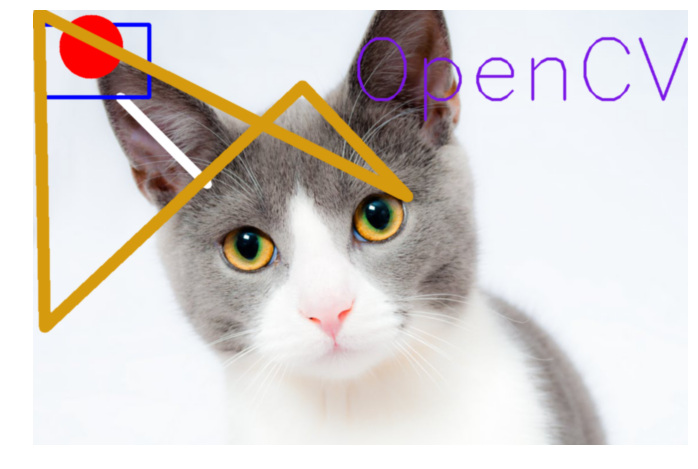

In [9]:
plt.rcParams['figure.figsize'] = 14,8
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='bicubic')
plt.axis('off');

Также следует заметить, что наложение геометрических фигур постоянно для картинки (draw), поэтому её нужно пересожнавать для экспериментов, иначе старые изображения останутся

## Часть четвертая
### Чтение видео

Для чтения видео необходимо воспользоваться функцией **VideoCapture**, которая может читать видео в двух режимах:

 - Чтение из файла: **cv2.VideoCapture('путь к файлу')**
 - Чтение с web-камеры: **cv2.VideoCapture(ind)**, где ind - порядковый номер желаемой камеры начиная с 0

Отображать видею следует через цикл, так как оно отображается покадрово

In [10]:
cap = cv2.VideoCapture(0)

while True:
    # cap возвращает 2 параметра: ret - bool (true, если сигнал с камеры или файла постувает), frame - изображение
    ret, frame = cap.read()
    # Я тут решил немного поиграться и конвертировать видео в формат градации серого
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Повернул изображение на 180 градусов, за это отвечает флаг - 1
    cv2.imshow('flip frame', cv2.flip(frame, 1))
    cv2.imshow('gray', gray)
    cv2.imshow('frame', frame)
    cv2.imshow('gray_flip', cv2.flip(gray, 1))
    # ВОТ НА ЭТУ КОНСТРУКЦИЮ СТОИТ ОБРАТИТЬ ВНИМАНИЕ cv2.waitKey(1) & 0xFF - побитовая операция and 
    # (0100 and 1111 = 0100) по сути тут мы блокируем возможность получения символа с кодировкой ord() 
    # выше 255 (ето рекомендация opencv), а также обозначаем, что нажатие 'q' закроет все окна
    # (раскладка английская иначе умрет кернел, потом мы решим эту проблему заменой на esc)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
#Не забываем высвободить видеоканал и закрыть все окна
cap.release()
cv2.destroyAllWindows()

Приведенная выше конструкция не подходит для чтения файлов ввиду того, что ret при работе с web-камерой почти всешда True, для работы с файлом следует немного поменять код:
```python
cap = cv2.VideoCapture(0)
#Созданим заранее для запуска цикла
ret = True
while ret == True:

    ret, frame = cap.read()
    cv2.imshow('frame', frame)

    if (ret != True) or (cv2.waitKey(10) & 0xFF == ord('q')):
        break

cap.release()
cv2.destroyAllWindows()
```

### Запись видео
Для записи видео нам необходимо две функции:

 - **VideoWriter_fourcc(codec) - инициализация кодека видео**
 - **VideoWriter('Адрес куда пишем', кодек, fps, разрешение)**
 
Побробнее можно почитать [тут](https://docs.opencv.org/3.1.0/dd/d43/tutorial_py_video_display.html)

In [11]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))

while True:

    ret, frame = cap.read()
    # Вот тут пришем
    out.write(frame)
    cv2.imshow('frame', frame)

    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# не забываем высвобождать потоки ввода и вывода
cap.release()
out.release()
cv2.destroyAllWindows()

## Далее мы пойдем чуть веселее, меньше букв больше картинок и эффектов

## Часть пятая
### Как логотип прикрепить к фону и сделать это более-менее красиво

In [12]:
logo = cv2.imread('../../img/cv2-2.jpg', cv2.IMREAD_COLOR)
ground = cv2.imread('../../img/cv2-3.png', cv2.IMREAD_COLOR)

Есть два изображения: логотип EA (товарный знак и все такое), и картинка с фоном (не верьте глазам, фон гораздо больше)

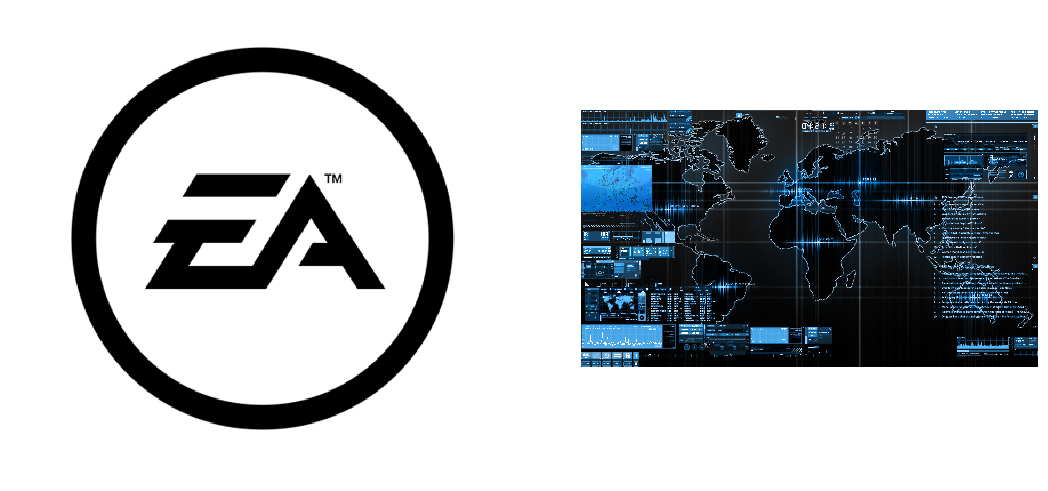

In [13]:
plt.rcParams['figure.figsize'] = 18,10
plt.subplot(121)
plt.imshow(cv2.cvtColor(logo, cv2.COLOR_BGR2RGB))
plt.axis('off');
plt.subplot(122)
plt.imshow(cv2.cvtColor(ground, cv2.COLOR_BGR2RGB))
plt.axis('off');

In [14]:
rows, cols, channels = logo.shape
#Указываем место размещения логотипа на фоне с учетом размера лого
roi = ground[0:rows, 0:cols]
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
# Тут мы для формирования маски указываем, что нижняя граница цвета для маски 220, верхняя 255
# (белый и близкие к нему оттенки серого)
ret, mask = cv2.threshold(logo_gray, 220, 255, cv2.THRESH_BINARY_INV)

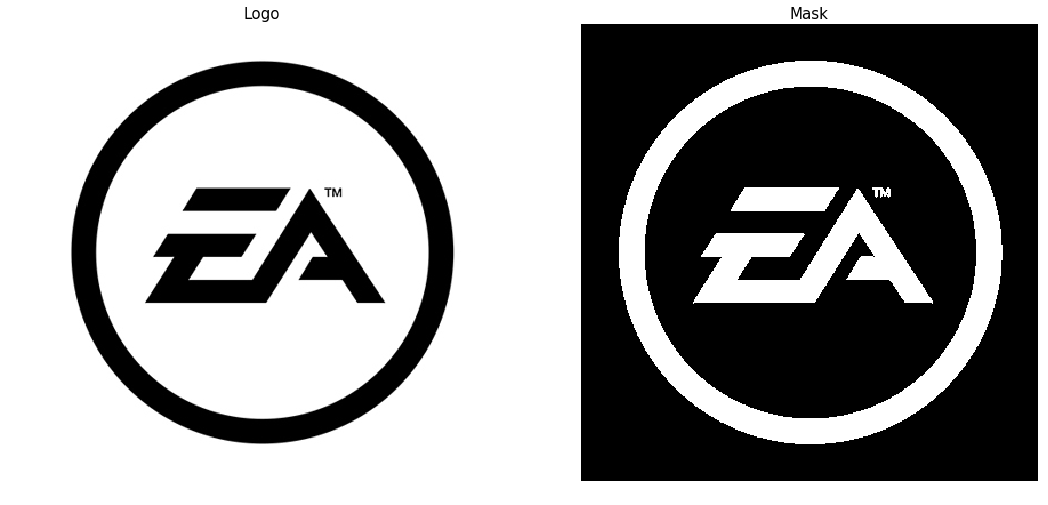

In [15]:
plt.rcParams['figure.figsize'] = 18,10
plt.subplot(121)
plt.imshow(logo)
plt.title('Logo', fontsize=15)
plt.axis('off');
plt.subplot(122)
plt.imshow(mask, cmap='gray')
plt.title('Mask', fontsize=15)
plt.axis('off');


# cv2.imshow('mask', mask)
# cv2.imshow('logo', logo)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Тут тонкий момент: в mask при помощи threshold() мы из рисунка выделили из лого только его бэкграунд (белые элементы оригинального лого), в mask_inv мы выделили только изображение без белого фона

In [16]:
mask_inv = cv2.bitwise_not(mask)

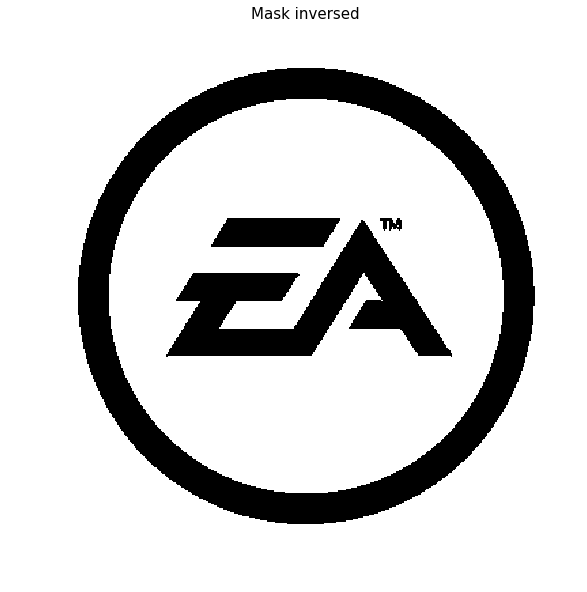

In [17]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(mask_inv, cmap='gray')
plt.title('Mask inversed', fontsize=15)
plt.axis('off');
# cv2.imshow('Mask inversed', mask_inv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [18]:
#Посредством bitwise_and и mask_inv мы вырезаем область логотипа на фоне#Посредс 
ground_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
logo_fg = cv2.bitwise_and(logo, logo, mask=mask)
dst = cv2.add(ground_bg, logo_fg)
ground[0:rows, 0:cols] = dst

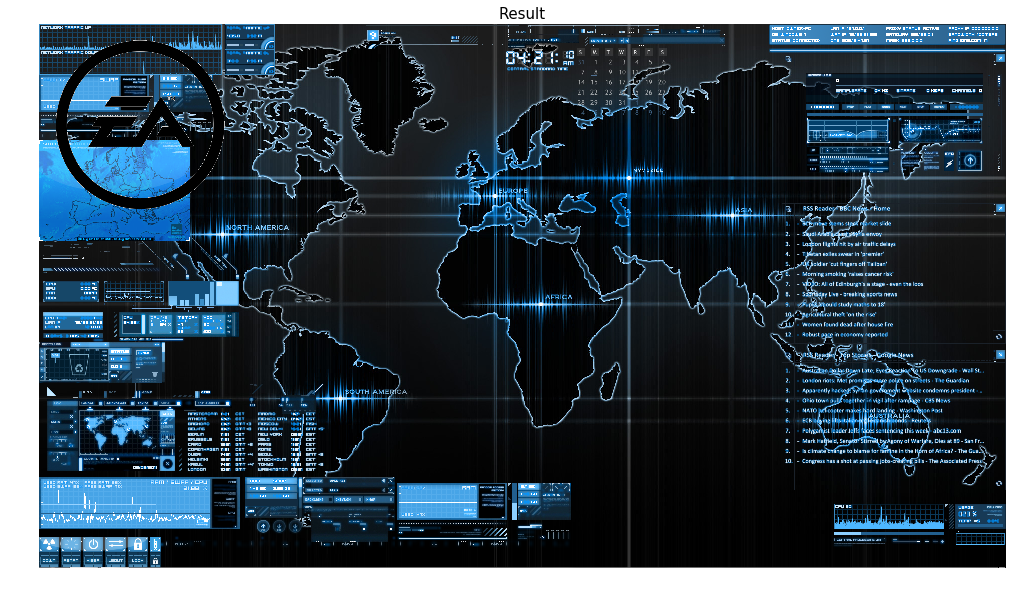

In [19]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(ground, cv2.COLOR_BGR2RGB))
plt.title('Result', fontsize=15)
plt.axis('off');

# ground = cv2.resize(ground, (640,480))
# cv2.imshow('add', ground)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Лого более высокого разрешения получилось бы лучше :-)

## Часть шестая
### Исправление затемненного изображения

Немного продолжим работу с функциями типа **threshold()**. У нас есть абсолютно читаемый скан книжной страницы!

In [20]:
bookpage = cv2.imread('../../img/cv2-4.jpg')

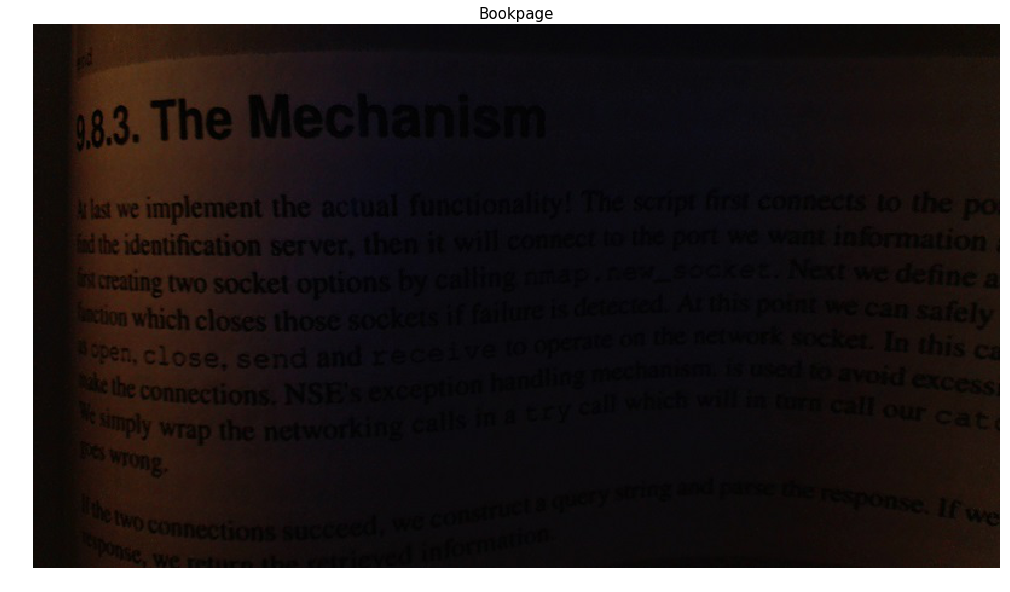

In [21]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(bookpage, cv2.COLOR_BGR2RGB))
plt.title('Bookpage', fontsize=15)
plt.axis('off');

# cv2.imshow('Bookpage', bookpage)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [22]:
retval, threshold = cv2.threshold(bookpage, 12, 255, cv2.THRESH_BINARY)

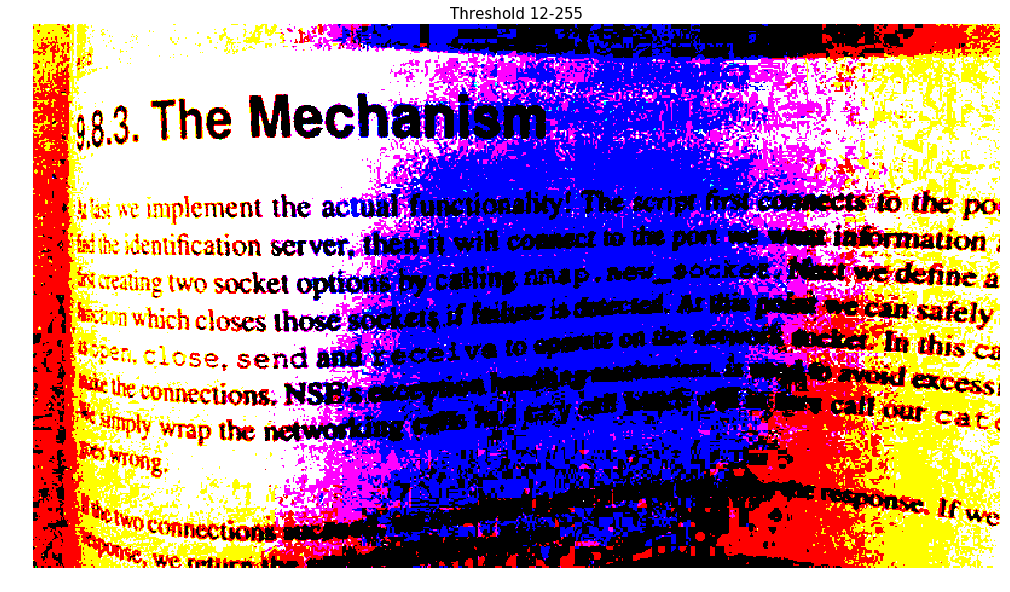

In [23]:
#Попробуем применить отсев по яркости пикселей
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))
plt.title('Threshold 12-255', fontsize=15)
plt.axis('off');


# cv2.imshow('Bookpage', bookpage)
# cv2.imshow('Threshold', threshold)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Все еще не очень! Попробуем сделать то же самое, но для изображения, преобразованного в оттенки серого.

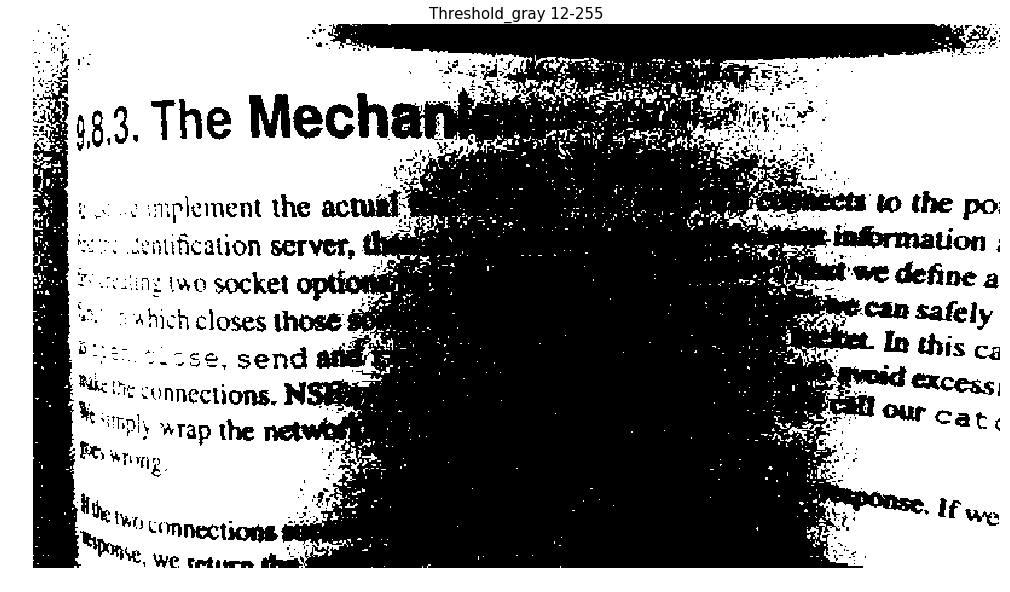

In [24]:
grayscaled = cv2.cvtColor(bookpage, cv2.COLOR_BGR2GRAY)
retval, threshold_gray = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(threshold_gray, cmap='gray')
plt.title('Threshold_gray 12-255', fontsize=15)
plt.axis('off');

# cv2.imshow('Bookpage', bookpage)
# cv2.imshow('Threshold', threshold)
# cv2.imshow('Threshold Gray', threshold_gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Как видно из изображения, применение жесткой границы цветов не приносит полезного эффекта. На этот случай мы применим адаптивный фильтр adaptiveThreshold(). Подробнее [тут](https://docs.opencv.org/3.4.0/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3) и [здесь](https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html)

In [25]:
gaus = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
retval, otsu = cv2.threshold(grayscaled, 125, 255, cv2.THRESH_OTSU)

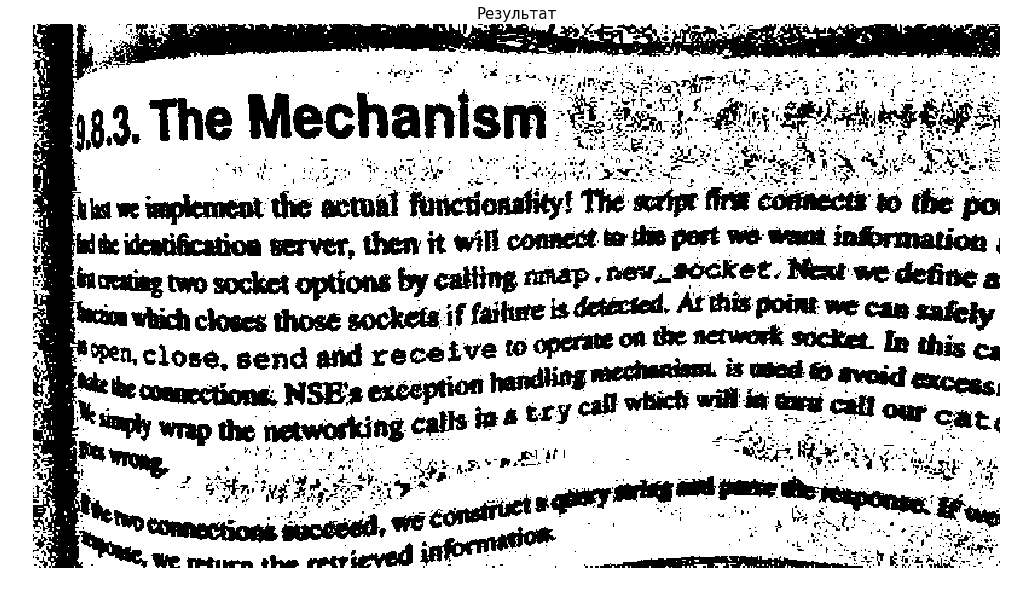

In [26]:
grayscaledgrayscal  = cv2.cvtColor(bookpage, cv2.COLOR_BGR2GRAY)
retval, threshold_gray = cv2.threshold(grayscaled, 12, 255, cv2.THRESH_BINARY)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(gaus, cmap='gray')
plt.title('Результат', fontsize=15)
plt.axis('off');

# cv2.imshow('Bookpage', bookpage)
# cv2.imshow('Threshold', threshold)
# cv2.imshow('Threshold Gray', threshold_gray)
# cv2.imshow('Threshold Adaptive', gaus)
# cv2.imshow('Threshold Otsu', otsu)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Часть седьмая
### Bluring


Тут бы я посоветовал использовать камеру и что-нибуль красное

In [27]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    # Тут необходимо преобразовать изображение в формат HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Задаем границы красного цвета
    lower_red = np.array([150,150,50])
    apper_red = np.array([180,255,255])
    
    # Создаем маску
    mask = cv2.inRange(hsv, lower_red, apper_red)
    #Применяем маску к изображению
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    
    kernel = np.ones((15,15), np.float32)/255
    
    #Производим разного рода преобразования
    smoothed = cv2.filter2D(res, -1, kernel)
    blur = cv2.GaussianBlur(res, (15,15), 0)
    median = cv2.medianBlur(res, 15)
    bilateral = cv2.bilateralFilter(res, 15, 75,75)
    
    k = cv2.waitKey(5) & 0xFF
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    cv2.imshow('smoothed', smoothed) 
    cv2.imshow('blur', blur)
    cv2.imshow('median', median)
    cv2.imshow('bilateral', bilateral)
    #Жмем esc для закрытия окон
    if k==27:
        break
cv2.destroyAllWindows()
cap.release()

Для ленивых, то же самое, но на изображении

In [28]:
in_red = cv2.imread('../../img/cv2-5.jpg')
    
hsv = cv2.cvtColor(in_red, cv2.COLOR_BGR2HSV)
# Задаем границы красного цвета
lower_red = np.array([150,150,50])
apper_red = np.array([180,255,255])
    
# Создаем маску
mask = cv2.inRange(hsv, lower_red, apper_red)
#Применяем маску к изображению
res = cv2.bitwise_and(in_red, in_red, mask=mask)
    
    
kernel = np.ones((15,15), np.float32)/255
    
#Производим разного рода преобразования
smoothed = cv2.filter2D(res, -1, kernel)
blur = cv2.GaussianBlur(res, (15,15), 0)
median = cv2.medianBlur(res, 15)
bilateral = cv2.bilateralFilter(res, 15, 75,75)

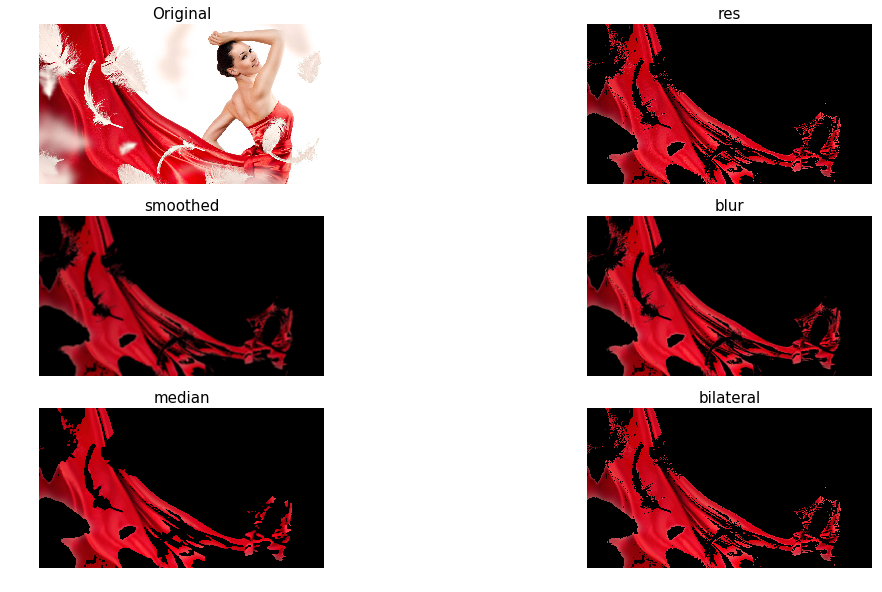

In [29]:
plt.rcParams['figure.figsize'] = 18,10
plt.subplot(321)
plt.imshow(cv2.cvtColor(in_red, cv2.COLOR_BGR2RGB))
plt.title('Original', fontsize=15)
plt.axis('off');
plt.subplot(322)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('res', fontsize=15)
plt.axis('off');
plt.subplot(323)
plt.imshow(cv2.cvtColor(smoothed, cv2.COLOR_BGR2RGB))
plt.title('smoothed', fontsize=15)
plt.axis('off');
plt.subplot(324)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('blur', fontsize=15)
plt.axis('off');
plt.subplot(325)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.title('median', fontsize=15)
plt.axis('off');
plt.subplot(326)
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
plt.title('bilateral', fontsize=15)
plt.axis('off');

### Denoising
Смягчение шума с камеры. Осень позоже на предыдущте действия. Тут опять лучше с камерой

In [30]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([150,150,50])
    apper_red = np.array([180,255,255])
    
    mask = cv2.inRange(hsv, lower_red, apper_red)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    kernel = np.array((5,5), np.uint8) 
    erosion = cv2.erode(mask, kernel, iterations=1)
    dilation = cv2.dilate(mask, kernel, iterations=1)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
 

   
    cv2.imshow('frame', frame)
    cv2.imshow('res', res)
    cv2.imshow('erosion', erosion)
    cv2.imshow('dilation', dilation)
    cv2.imshow('opening', opening)
    cv2.imshow('closing', closing)
    
    k = cv2.waitKey(5) & 0xFF
    if k==27:
        break
cv2.destroyAllWindows()
cap.release()

Ленивым!)

In [31]:
hsv = cv2.cvtColor(in_red, cv2.COLOR_BGR2HSV)

lower_red = np.array([150,150,50])
apper_red = np.array([180,255,255])
    
mask = cv2.inRange(hsv, lower_red, apper_red)
    
res = cv2.bitwise_and(in_red, in_red, mask=mask)
    
kernel = np.array((5,5), np.uint8) 
erosion = cv2.erode(mask, kernel, iterations=1)
dilation = cv2.dilate(mask, kernel, iterations=1)
    
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

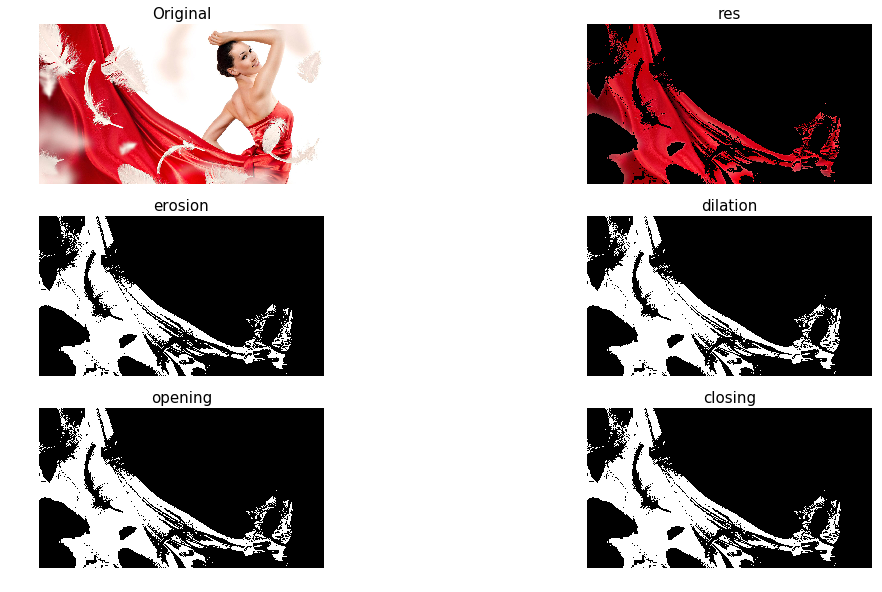

In [32]:
plt.rcParams['figure.figsize'] = 18,10
plt.subplot(321)
plt.imshow(cv2.cvtColor(in_red, cv2.COLOR_BGR2RGB))
plt.title('Original', fontsize=15)
plt.axis('off');
plt.subplot(322)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title('res', fontsize=15)
plt.axis('off');
plt.subplot(323)
plt.imshow(erosion, cmap='gray')
plt.title('erosion', fontsize=15)
plt.axis('off');
plt.subplot(324)
plt.imshow(dilation, cmap='gray')
plt.title('dilation', fontsize=15)
plt.axis('off');
plt.subplot(325)
plt.imshow(opening, cmap='gray')
plt.title('opening', fontsize=15)
plt.axis('off');
plt.subplot(326)
plt.imshow(closing, cmap='gray')
plt.title('closing', fontsize=15)
plt.axis('off');

## Часть восьмая
### Распознавание границ
Довольно часто при работе с изображениями есть необходимость убрать лишнюю информацию для упрощения обучения сетей: цвета, некоторая детализация объектов. Для этих целей прекрасно подходит встроенный в OpenCV алгоритм Canny

 - Canny(Image, minVal, maxVal), где minVal, maxVal - параметры алгоритма [за подробностями сюда](https://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html)

In [33]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()

    edges = cv2.Canny(frame, 200,200)
    cv2.imshow('Edges', edges)
    k = cv2.waitKey(5) & 0xFF
    # Чтобы закрыть окно нажмите Esc
    if k==27:
        break
cv2.destroyAllWindows()
cap.release()

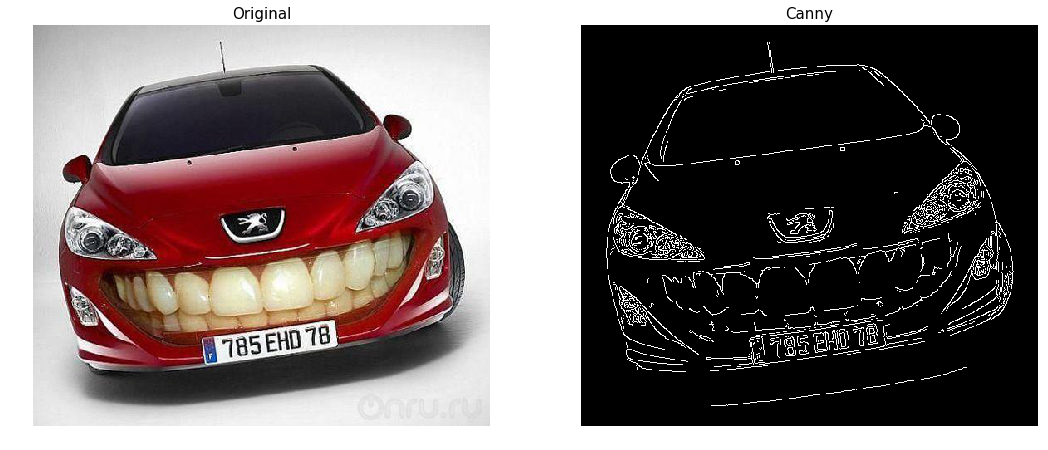

In [34]:
car = cv2.imread('../../img/cv2-6.jpg')
edges = cv2.Canny(car, 200,300)

plt.rcParams['figure.figsize'] = 18,10
plt.subplot(121)
plt.imshow(cv2.cvtColor(car, cv2.COLOR_BGR2RGB))
plt.title('Original', fontsize=15)
plt.axis('off');
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Canny', fontsize=15)
plt.axis('off');

## Часть девятая
### Поиск по шаблону
Довольно часто стоит задача поиска объектов по шаблону. Для этого будет полезной функция **matchTemplate()**

 - matchTemplate(Image, Template, flag)

In [35]:
#Загружаем изображение
img_bgr = cv2.imread('../../img/cv2-7.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

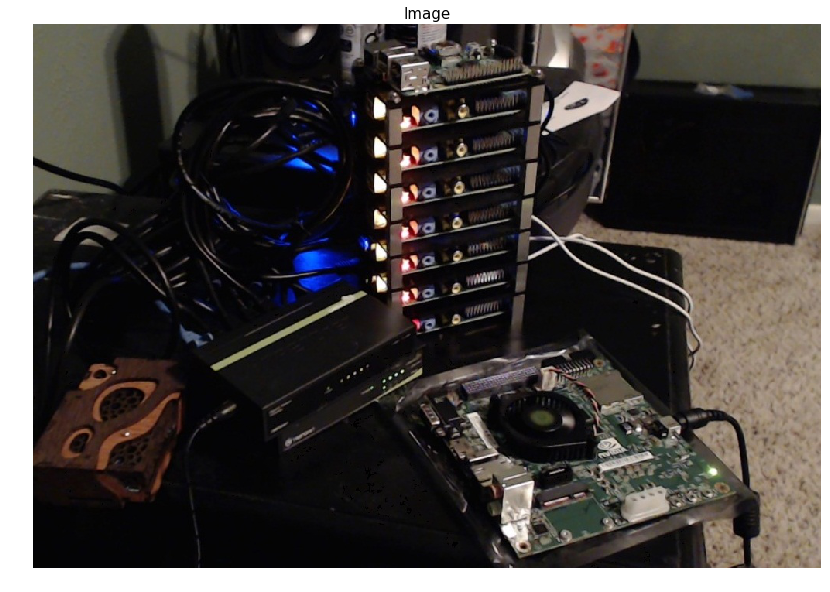

In [36]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

In [37]:
# Грузим шаблон для поиска# Грузим 
template = cv2.imread('../../img/cv2-8.jpg', 0)

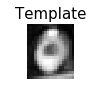

In [38]:
plt.rcParams['figure.figsize'] = 1,1
plt.imshow(template, cmap='gray')
plt.title('Template', fontsize=15)
plt.axis('off');

In [39]:
w, h = template.shape[::-1]

In [40]:
#Ищем похожие объекты
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
# Ставим границу ссответствия
threshold = 0.78
#Поиск индексов похожих объектов
loc = np.where(res >= threshold)

In [41]:
#Тут пригодятся знания, про прорисовку прямоугольников#Тут при 
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0]+w, pt[1]+h), (0,255,255), 2)

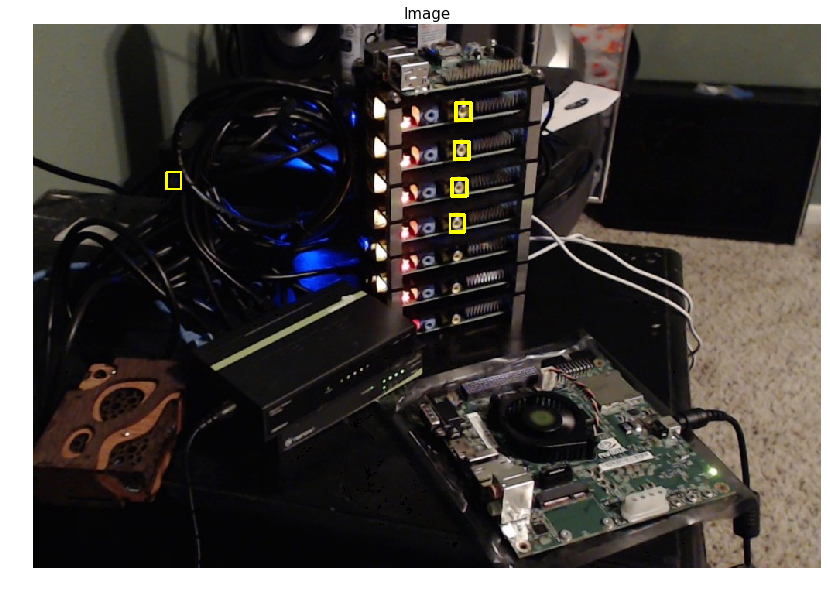

In [42]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

# cv2.imshow('detected', img_bgr)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Не идеально, но уже что-то

## Часть десятая
### Сопоставление элементов
В OpenCV осуществлена возможность сопоставления элементов одинаковых объектов на различных картинках

In [43]:
img1 = cv2.imread('../../img/cv2-9.jpg', 0)
img2 = cv2.imread('../../img/cv2-10.jpg', 0)

In [44]:
orb = cv2.ORB_create()

In [45]:
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [46]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [47]:
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x: x.distance)

In [48]:
# matches[:10] означает, что нас интересует 10 элементов
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags = 2)

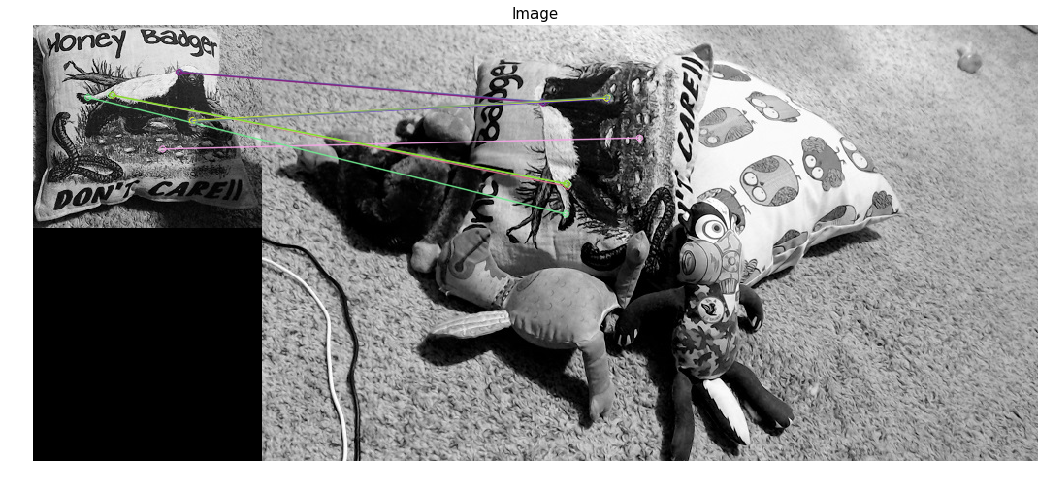

In [49]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

# cv2.imshow('Corners', img3)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Самое интересное!!!
## Определение лица и глаз при помощи каскадов Хаара

Каскады Хаара - довольно древняя методика выявдения фич из изображения, но все еще работает. Для выполнения этой части туториала необходимо пройти [сюда](https://github.com/opencv/opencv/tree/master/data/haarcascades) и скачать 2 файла **'haarcascade_frontalface_default.xml'** и **'haarcascade_eye.xml'**. 
  Причем скачать не кликнув правой клавишей мыши, а нажать на файл, кликнуть по опции raw и только потом созранить .xml
<img src="../../img/cv2-11.png">


Лучше используйте камеру!

In [50]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [51]:
cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0,255,0), 2)
            
    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

Далее для просмотра

In [52]:
img = cv2.imread('../../img/cv2-12.jpg')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Ищем лица
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#Мы хотим искать глаза внутри лица
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0,255,0), 2)

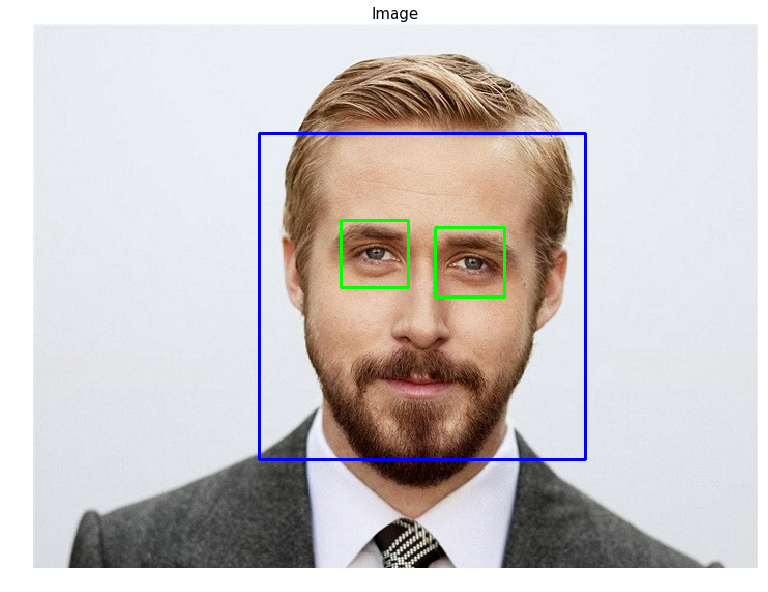

In [53]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

Вроде бы все хорошо, но работает не достаточно хорошо!

In [54]:
img = cv2.imread('../../img/cv2-13.jpg')
gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Ищем лица
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#Мы хотим искать глаза внутри лица
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0,255,0), 2)

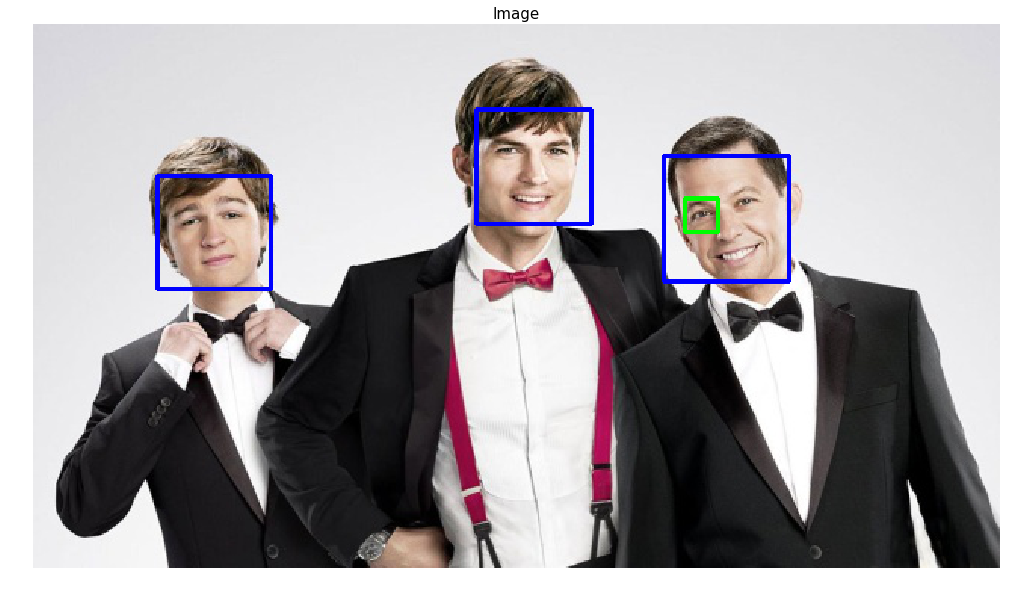

In [55]:
plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

В общем не совсем то! Поэтому я предлагаю попробовать воспользоваться библиотекой, основанной на нейронных сетях **dlib**

# BONUS DLIB
Для установки пользователям *nix систем лучше воспользоваться [репозиторием](https://github.com/davisking/dlib), устанавливается по инструкции без проблем, правда перед компиляцией нужно поставить libx11-dev (sudo apt-get install libx11-dev).

С пользователями Windows не все так просто, компилировать не советую ни в коем случае, лучше установите **dlib-19.8.1-cp36-cp36m-win_amd64.whl** [отсюда](https://pypi.org/simple/dlib/), потом *pip install dlib-19.8.1-cp36-cp36m-win_amd64.whl*

Также надо будет скачать вот этот [файл](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2) и разархивировать его, потом он будет использоваться в dlib.shape_predictor

И последнее... Надо установить *imutils* (pip install imutils)

In [56]:
import dlib
import imutils
from imutils import face_utils

In [57]:
def rect_to_bb(rect):
    #Принимает на вход объект dlib, содержащий координаты лиц и возвращает кортеж
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y


    return (x, y, w, h)

In [58]:
def shape_to_np(shape, dtype="int"):

    # возвращает координаты элементов лица
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    return coords

In [59]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

## Обязательно пробовать с камерой

In [60]:
cap = cv2.VideoCapture(0)
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dets = detector(gray, 1)
    for (i, rect) in enumerate(dets):

        shape = predictor(img, rect)
        shape = face_utils.shape_to_np(shape)

        # Очертание лица
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Нумировка лица
        cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        #Прорисовка элементов лица
        for (x, y) in shape:
            cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
# out.release()
cv2.destroyAllWindows()

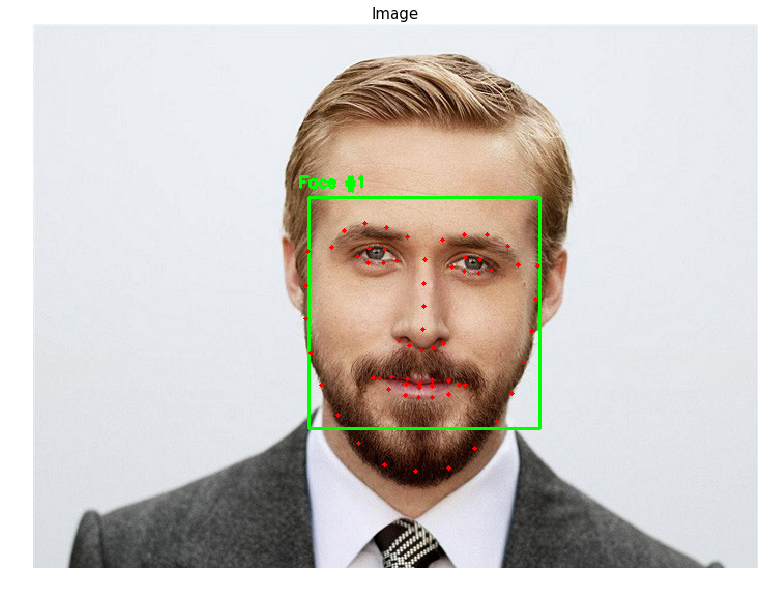

In [61]:
img = cv2.imread('../../img/cv2-12.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)
for (i, rect) in enumerate(dets):

    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)
    # Очертание лица
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Нумировка лица
    cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #Прорисовка элементов лица
    for (x, y) in shape:
        cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

Так уже лучше, проверим несколько лиц

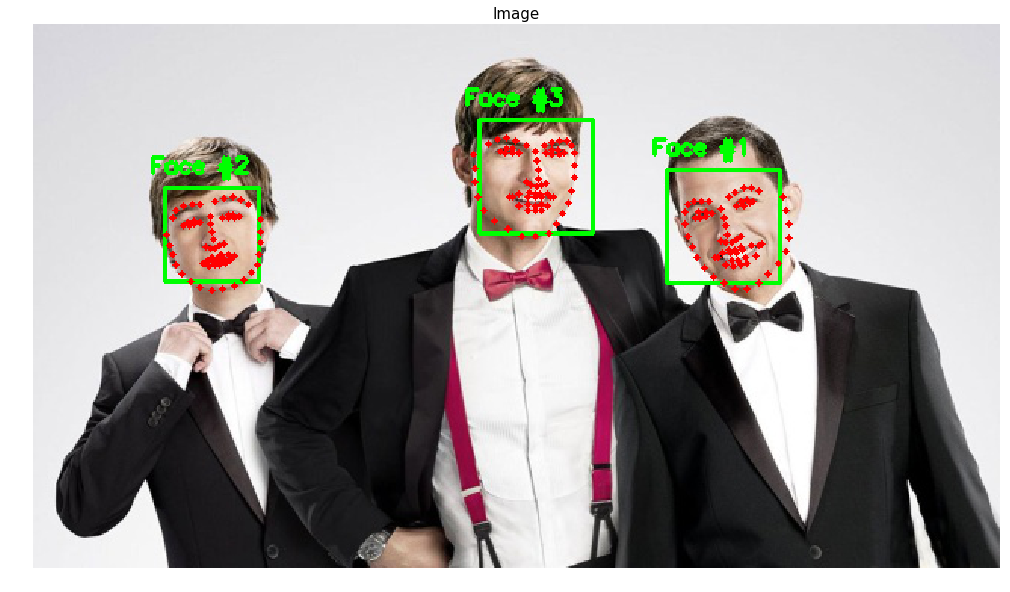

In [62]:
img = cv2.imread('../../img/cv2-13.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)
for (i, rect) in enumerate(dets):

    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)
    # Очертание лица
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Нумировка лица
    cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #Прорисовка элементов лица
    for (x, y) in shape:
        cv2.circle(img, (x, y), 2, (0, 0, 255), -1)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

Тоже работает хорошо! Но можно сделать интереснее: точки на лице имеют определенную нумирацию.
<img src="../../img/cv2-14.jpg">

Следовательно можно сделать еще так!! + закомментил строки записи видео с определением лица

# Опять начинаем с камеры

In [63]:
cap = cv2.VideoCapture(0)
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# out = cv2.VideoWriter('output.avi',fourcc, 10.0, (640,480))
while True:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    dets = detector(gray, 1)
    for (i, rect) in enumerate(dets):
  
        shape = predictor(img, rect)
        shape = face_utils.shape_to_np(shape)


        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)


        cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


        for i,  (x, y) in enumerate(shape):
            if i < 16:
                cv2.circle(img, (x, y), 2, (0, 0, 255), -1)
            elif i>=17 and i < 27:
                cv2.circle(img, (x, y), 2, (0, 255, 0), -1)
            elif i >= 27 and i < 36:
                cv2.circle(img, (x, y), 2, (255, 0, 0), -1)  
            elif i>=36 and i < 48:
                cv2.circle(img, (x, y), 2, (16, 255, 255), -1) 
            else:
                cv2.circle(img, (x, y), 2, (135, 11, 189), -1)
#     out.write(img)
    cv2.imshow('img', img)
    k = cv2.waitKey(5) & 0xff
    if k == 27:
        break
cap.release()
# out.release()
cv2.destroyAllWindows()

На картинках

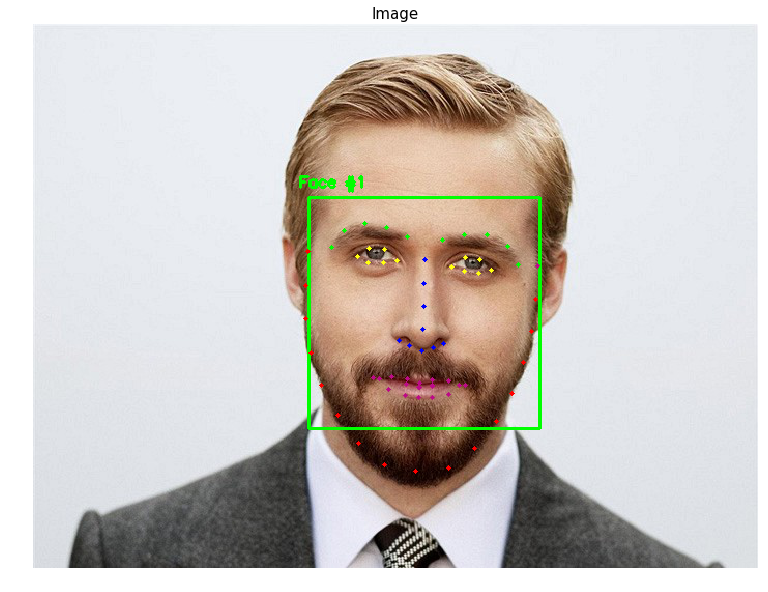

In [64]:
img = cv2.imread('../../img/cv2-12.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)
for (i, rect) in enumerate(dets):

    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)
    # Очертание лица
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Нумировка лица
    cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #Прорисовка элементов лица + задаем цвет для каждого элемента
    for i,  (x, y) in enumerate(shape):
        if i < 16:
            cv2.circle(img, (x, y), 2, (0, 0, 255), -1)
        elif i>=17 and i < 27:
            cv2.circle(img, (x, y), 2, (0, 255, 0), -1)
        elif i >= 27 and i < 36:
            cv2.circle(img, (x, y), 2, (255, 0, 0), -1)  
        elif i>=36 and i < 48:
            cv2.circle(img, (x, y), 2, (16, 255, 255), -1) 
        else:
            cv2.circle(img, (x, y), 2, (135, 11, 189), -1)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

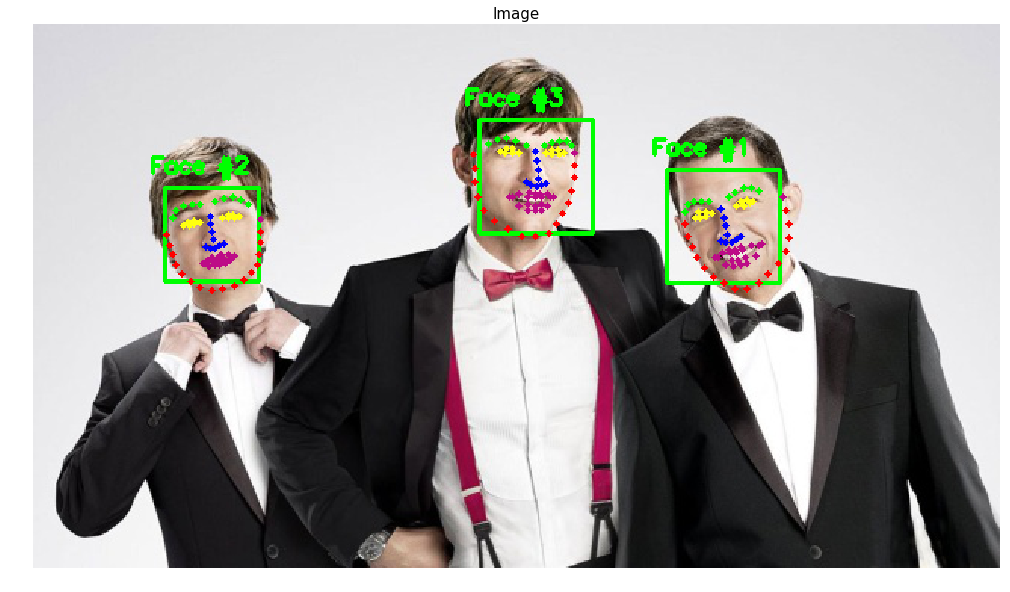

In [65]:
img = cv2.imread('../../img/cv2-13.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dets = detector(gray, 1)
for (i, rect) in enumerate(dets):

    shape = predictor(img, rect)
    shape = face_utils.shape_to_np(shape)
    # Очертание лица
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Нумировка лица
    cv2.putText(img, "Face #{}".format(i + 1), (x - 10, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    #Прорисовка элементов лица + задаем цвет для каждого элемента
    for i,  (x, y) in enumerate(shape):
        if i < 16:
            cv2.circle(img, (x, y), 2, (0, 0, 255), -1)
        elif i>=17 and i < 27:
            cv2.circle(img, (x, y), 2, (0, 255, 0), -1)
        elif i >= 27 and i < 36:
            cv2.circle(img, (x, y), 2, (255, 0, 0), -1)  
        elif i>=36 and i < 48:
            cv2.circle(img, (x, y), 2, (16, 255, 255), -1) 
        else:
            cv2.circle(img, (x, y), 2, (135, 11, 189), -1)

plt.rcParams['figure.figsize'] = 18,10
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image', fontsize=15)
plt.axis('off');

### Гифка!!!!!

<img src="https://habrastorage.org/webt/-z/ha/ba/-zhabappcnh9pvoyvddgrpkdhho.gif">

## Все! Дошедшим до конца - Спасибо! Надеюсь Вам понравился туториал!